## Prédiction de la valeur d'un vol avec le Boosting

Kaggle : https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

Nous travaillerons avec les datasets brut, pas ceux travaillé par les personnes qui l'ont publié sur Kaggle. Il y aura deux datasets que l'on va utiliser ensemble.

In [73]:
import numpy as np
import pandas as pd


economy = pd.read_csv("economy.csv")
economy["Type"] = "Economy"

business = pd.read_csv("business.csv")
business["Type"] = "Business"

df = pd.concat((economy, business))
df.reset_index(inplace=True, drop=True)
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Type
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",Economy


## Exploration et nettoyage

Commençons par explorer les données. On veut s'assurer de la cohérence des données et identifier des variables qui pourraient être importante dans la modélisation.

**Consigne** : Modifier l'ensemble des noms de colonnes pour qu'ils commençent par une capitale. Puis supprimer les colonnes *Ch_code* et *Num_code*.

In [74]:
dico = {}
for i in range(len(df.columns)):
    dico[df.columns[i]] = df.columns[i].capitalize()
df.rename(columns = dico, inplace = True)
df.head(5)

,Date,Airline,Ch_code,Num_code,Dep_time,From,Time_taken,Stop,Arr_time,To,Price,Type
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",Economy


In [75]:
df.drop(columns =['Ch_code', 'Num_code'], inplace = True)
df.head(5)

,Date,Airline,Dep_time,From,Time_taken,Stop,Arr_time,To,Price,Type
0,11-02-2022,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy
1,11-02-2022,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy
2,11-02-2022,AirAsia,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy
3,11-02-2022,Vistara,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy
4,11-02-2022,Vistara,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",Economy


Les colonnes *Date*, *Dep_time*, *Time_taken* et *Arr_time* correspondent toute à des dates ou durée. Mettons-les au bon format.

### Travail des dates et des temps

**Consigne** : A l'aide de la fonction [*pd.to_datetime*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html), modifier la colonne *Date* puis créer la colonne *Flight_month* qui contient le mois du vol.

In [76]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Flight_month'] = df['Date'].dt.strftime('%m')
df.head()

,Date,Airline,Dep_time,From,Time_taken,Stop,Arr_time,To,Price,Type,Flight_month
0,2022-02-11,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy,02
1,2022-02-11,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy,02
2,2022-02-11,AirAsia,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy,02
3,2022-02-11,Vistara,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy,02
4,2022-02-11,Vistara,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",Economy,02


**Consigne** : Remplacer la colonne *Dep_time* par une colonne *Departure_hour* qui ne conserve que l'heure de départ. Faire de même avec la colonne *Arr_time* par *Arrival_hour*.

In [77]:
df['Departure_hour'] = pd.to_datetime(df['Dep_time'], format = '%H:%M').dt.strftime('%H')
df.head()

,Date,Airline,Dep_time,From,Time_taken,Stop,Arr_time,To,Price,Type,Flight_month,Departure_hour
0,2022-02-11,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy,02,18
1,2022-02-11,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy,02,06
2,2022-02-11,AirAsia,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy,02,04
3,2022-02-11,Vistara,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy,02,10
4,2022-02-11,Vistara,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",Economy,02,08


In [78]:
df['Arrival_hour'] = pd.to_datetime(df['Arr_time'], format = '%H:%M').dt.strftime('%H')
df.head()

,Date,Airline,Dep_time,From,Time_taken,Stop,Arr_time,To,Price,Type,Flight_month,Departure_hour,Arrival_hour
0,2022-02-11,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy,02,18,21
1,2022-02-11,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy,02,06,08
2,2022-02-11,AirAsia,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy,02,04,06
3,2022-02-11,Vistara,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy,02,10,12
4,2022-02-11,Vistara,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",Economy,02,08,11


In [79]:
df.drop(columns = ['Arr_time', 'Dep_time'], inplace = True)
df.head()

,Date,Airline,From,Time_taken,Stop,To,Price,Type,Flight_month,Departure_hour,Arrival_hour
0,2022-02-11,SpiceJet,Delhi,02h 10m,non-stop,Mumbai,"5,953",Economy,02,18,21
1,2022-02-11,SpiceJet,Delhi,02h 20m,non-stop,Mumbai,"5,953",Economy,02,06,08
2,2022-02-11,AirAsia,Delhi,02h 10m,non-stop,Mumbai,"5,956",Economy,02,04,06
3,2022-02-11,Vistara,Delhi,02h 15m,non-stop,Mumbai,"5,955",Economy,02,10,12
4,2022-02-11,Vistara,Delhi,02h 20m,non-stop,Mumbai,"5,955",Economy,02,08,11


On souhaite également créer la colonne *Flight_time* à partir de la colonne *Time_taken* qui correspondra à la durée du vol en minutes.

In [80]:
import re

def convert_to_time(string_time):
    pattern = r'(\d+)h (\d+)m'
    match = re.match(pattern, string_time)
    if match:
        hours = int(match.group(1))
        minutes = int(match.group(2))
    else:
        hours, minutes = 0, 0
    return 60 * hours + minutes

df["Flight_time"] = df["Time_taken"].apply(lambda time: convert_to_time(time))
df = df.drop(columns=["Time_taken"], axis=1)

In [81]:
df.head()

,Date,Airline,From,Stop,To,Price,Type,Flight_month,Departure_hour,Arrival_hour,Flight_time
0,2022-02-11,SpiceJet,Delhi,non-stop,Mumbai,"5,953",Economy,02,18,21,130
1,2022-02-11,SpiceJet,Delhi,non-stop,Mumbai,"5,953",Economy,02,06,08,140
2,2022-02-11,AirAsia,Delhi,non-stop,Mumbai,"5,956",Economy,02,04,06,130
3,2022-02-11,Vistara,Delhi,non-stop,Mumbai,"5,955",Economy,02,10,12,135
4,2022-02-11,Vistara,Delhi,non-stop,Mumbai,"5,955",Economy,02,08,11,140


### Autre colonnes

**Consigne** : Explorer la colonne *Stop* et en extraire le nombre d'escale qui sont réalisés. La colonne sera catégorielle.

In [84]:
df['Stop'].value_counts()

Stop
1      250929
non     36044
2+      13288
Name: count, dtype: int64

In [85]:
df['Stop'] = df['Stop'].str.split('-').str[0]
df.head()

,Date,Airline,From,Stop,To,Price,Type,Flight_month,Departure_hour,Arrival_hour,Flight_time
0,2022-02-11,SpiceJet,Delhi,non,Mumbai,"5,953",Economy,02,18,21,130
1,2022-02-11,SpiceJet,Delhi,non,Mumbai,"5,953",Economy,02,06,08,140
2,2022-02-11,AirAsia,Delhi,non,Mumbai,"5,956",Economy,02,04,06,130
3,2022-02-11,Vistara,Delhi,non,Mumbai,"5,955",Economy,02,10,12,135
4,2022-02-11,Vistara,Delhi,non,Mumbai,"5,955",Economy,02,08,11,140


In [86]:
df['Stop'].value_counts()

Stop
1      250929
non     36044
2+      13288
Name: count, dtype: int64

In [87]:
def stop_change(name):
    if(name == 'non'):
        return '0'
    else:
        return(str(name))
df['Stop'] = df['Stop'].apply(stop_change)
df.head()

,Date,Airline,From,Stop,To,Price,Type,Flight_month,Departure_hour,Arrival_hour,Flight_time
0,2022-02-11,SpiceJet,Delhi,0,Mumbai,"5,953",Economy,02,18,21,130
1,2022-02-11,SpiceJet,Delhi,0,Mumbai,"5,953",Economy,02,06,08,140
2,2022-02-11,AirAsia,Delhi,0,Mumbai,"5,956",Economy,02,04,06,130
3,2022-02-11,Vistara,Delhi,0,Mumbai,"5,955",Economy,02,10,12,135
4,2022-02-11,Vistara,Delhi,0,Mumbai,"5,955",Economy,02,08,11,140


In [88]:
df['Stop'].value_counts()

Stop
1     250929
0      36044
2+     13288
Name: count, dtype: int64

**Consigne** : A l'aide de la méthode *info*, identifier puis corriger le problème de la colonne *Price*.

In [89]:
df['Price'].info()
# colonne n'est pas en forme de chiffres

<class 'pandas.core.series.Series'>
RangeIndex: 300261 entries, 0 to 300260
Series name: Price
Non-Null Count   Dtype 
--------------   ----- 
300261 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


In [91]:
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = pd.to_numeric(df['Price'])
df.head()

,Date,Airline,From,Stop,To,Price,Type,Flight_month,Departure_hour,Arrival_hour,Flight_time
0,2022-02-11,SpiceJet,Delhi,0,Mumbai,5953,Economy,02,18,21,130
1,2022-02-11,SpiceJet,Delhi,0,Mumbai,5953,Economy,02,06,08,140
2,2022-02-11,AirAsia,Delhi,0,Mumbai,5956,Economy,02,04,06,130
3,2022-02-11,Vistara,Delhi,0,Mumbai,5955,Economy,02,10,12,135
4,2022-02-11,Vistara,Delhi,0,Mumbai,5955,Economy,02,08,11,140


In [92]:
df['Price'].isna().sum()

0

**Consigne** : Remplacer la variable *Type* par une valeur 0 ou 1 (pour business). On modifiera le nom de la colonne en conséquence.

In [96]:
df['Business'] = df['Type'].apply(lambda name : 0 if(name =='Economy') else 1)
df.drop(columns = 'Type', inplace = True)
df

,Date,Airline,From,Stop,To,Price,Flight_month,Departure_hour,Arrival_hour,Flight_time,Business
0,2022-02-11,SpiceJet,Delhi,0,Mumbai,5953,02,18,21,130,0
1,2022-02-11,SpiceJet,Delhi,0,Mumbai,5953,02,06,08,140,0
2,2022-02-11,AirAsia,Delhi,0,Mumbai,5956,02,04,06,130,0
3,2022-02-11,Vistara,Delhi,0,Mumbai,5955,02,10,12,135,0
4,2022-02-11,Vistara,Delhi,0,Mumbai,5955,02,08,11,140,0
...,...,...,...,...,...,...,...,...,...,...,...
300256,2022-03-31,Vistara,Chennai,1,Hyderabad,69265,03,09,19,605,1
300257,2022-03-31,Vistara,Chennai,1,Hyderabad,77105,03,12,22,625,1
300258,2022-03-31,Vistara,Chennai,1,Hyderabad,79099,03,07,20,830,1
300259,2022-03-31,Vistara,Chennai,1,Hyderabad,81585,03,07,17,600,1


**Consigne** : Afficher la représentativité de chaque compagnie aérienne en utilisant la méthode [*value_counts*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html). Faire de même avec les colonnes *From* et *To* puis commenter.

In [97]:
df['Airline'].value_counts()

Airline
Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: count, dtype: int64

In [98]:
df['From'].value_counts()

From
Delhi        61345
Mumbai       60903
Bangalore    52106
Kolkata      46347
Hyderabad    40860
Chennai      38700
Name: count, dtype: int64

In [99]:
df['To'].value_counts()

To
Mumbai       59109
Delhi        57361
Bangalore    51112
Kolkata      49535
Hyderabad    42776
Chennai      40368
Name: count, dtype: int64

**Consigne** : A la lumière des observations précédentes, réaliser un One-Hot-Encoding avec la fonction [*pd.get_dummies*](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

In [100]:
df = pd.get_dummies(df, columns = ['Airline', 'From', 'To'])
df.head()

,Date,Stop,Price,Flight_month,Departure_hour,Arrival_hour,Flight_time,Business,Airline_Air India,Airline_AirAsia,...,From_Delhi,From_Hyderabad,From_Kolkata,From_Mumbai,To_Bangalore,To_Chennai,To_Delhi,To_Hyderabad,To_Kolkata,To_Mumbai
0,2022-02-11,0,5953,02,18,21,130,0,False,False,...,True,False,False,False,False,False,False,False,False,True
1,2022-02-11,0,5953,02,06,08,140,0,False,False,...,True,False,False,False,False,False,False,False,False,True
2,2022-02-11,0,5956,02,04,06,130,0,False,True,...,True,False,False,False,False,False,False,False,False,True
3,2022-02-11,0,5955,02,10,12,135,0,False,False,...,True,False,False,False,False,False,False,False,False,True
4,2022-02-11,0,5955,02,08,11,140,0,False,False,...,True,False,False,False,False,False,False,False,False,True


**Consigne** : Trier la totalité du dataset par la colonne *Date* avec la méthode [*sort_values*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) puis supprimer la colonne *Date*. On prendra soin d'avoir une réindexation du dataset.

In [105]:
df = df.sort_values(by = ['Date'], ignore_index = True)
df.head()

,Date,Stop,Price,Flight_month,Departure_hour,Arrival_hour,Flight_time,Business,Airline_Air India,Airline_AirAsia,...,From_Delhi,From_Hyderabad,From_Kolkata,From_Mumbai,To_Bangalore,To_Chennai,To_Delhi,To_Hyderabad,To_Kolkata,To_Mumbai
0,2022-02-11,0,5953,02,18,21,130,0,False,False,...,True,False,False,False,False,False,False,False,False,True
1,2022-02-11,1,16044,02,15,16,1510,0,False,False,...,False,False,True,False,False,False,False,False,False,True
2,2022-02-11,1,16044,02,15,12,1275,0,False,False,...,False,False,True,False,False,False,False,False,False,True
3,2022-02-11,1,16044,02,15,11,1215,0,False,False,...,False,False,True,False,False,False,False,False,False,True
4,2022-02-11,1,16044,02,10,16,375,0,False,False,...,False,False,True,False,False,False,False,False,False,True


In [106]:
df.drop(columns = 'Date', inplace = True)
df

,Stop,Price,Flight_month,Departure_hour,Arrival_hour,Flight_time,Business,Airline_Air India,Airline_AirAsia,Airline_GO FIRST,...,From_Delhi,From_Hyderabad,From_Kolkata,From_Mumbai,To_Bangalore,To_Chennai,To_Delhi,To_Hyderabad,To_Kolkata,To_Mumbai
0,0,5953,02,18,21,130,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1,1,16044,02,15,16,1510,0,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,1,16044,02,15,12,1275,0,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,1,16044,02,15,11,1215,0,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,1,16044,02,10,16,375,0,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,1,64285,03,18,19,1505,1,False,False,False,...,False,False,False,True,False,False,False,False,True,False
300257,2+,66671,03,12,19,440,1,False,False,False,...,False,False,False,True,False,False,False,False,True,False
300258,1,67645,03,17,08,885,1,False,False,False,...,False,False,False,True,False,False,False,False,True,False
300259,1,64285,03,19,09,830,1,False,False,False,...,False,False,False,True,False,False,False,False,True,False


## Modélisation

Puisque nous avons un dataset indexé par le temps, nous ne pouvons pas faire de coupure aléatoire.

**Consigne** : Ecrire une fonction *split_time_dataset* qui prend en paramètre
* *X* : une matrice
* *y* : un vecteur
* *train_ratio* : proportion d'observation à placer dans le dataset d'entraînement
La fonction renverra un tuple de même format que la fonction [*train_test_split*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de scikit-learn.

In [108]:
def split_time_dataset(X, y, train_ratio):
    train_index = int(train_ratio*len(y))
    X_train = X.iloc[:train_index]
    X_test = X.iloc[train_index:]
    y_train = y.iloc[:train_index]
    y_test = y.iloc[train_index:]
    return X_train, X_test, y_train, y_test

**Consigne** : A l'aide la fonction précédente, générer un dataset d'entraînement composé de 75% des observations.

On décide de travailler avec le modèle [LightGBM](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html).

**Consigne** : Construire un modèle avec 50 arbres, puis l'entraîner et calculer le vecteur prédit pour le dataset de test.

In [123]:
df['Departure_hour'] = pd.to_numeric(df['Departure_hour'])
df['Arrival_hour'] = pd.to_numeric(df['Arrival_hour'])
df['Flight_month'] = pd.to_numeric(df['Flight_month'])
df = pd.get_dummies(df, columns = ['Stop'])

In [124]:
X_train, X_test, y_train, y_test = split_time_dataset(df.drop(columns='Price'), df['Price'], 0.75)

In [125]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(n_estimators = 50)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 225195, number of used features: 28
[LightGBM] [Info] Start training from score 21513.854020


array([51268.98106469, 52810.13071179, 46804.79529271, ...,
       65918.07637201, 64592.43499584, 56218.61865205])

**Consigne** : Construire une fonction *print_performance* qui prend en paramètre un vecteur *y_true* et un vecteur *y_pred* et qui calcule, puis affiche, la valeur de la RMSE et du R2. Pour aider à l'interprétation, on affichera également la valeur moyenne du vecteur *y_test*.

## A battre : RMSE = 2673 et R2 = 0.98

In [142]:
from sklearn.metrics import r2_score

def print_performance(y_true,y_pred):
    rmse = np.sqrt(np.mean((y_pred-y_true)**2))
    r2 = r2_score(y_true,y_pred)
    moy = np.mean(y_true)
    print("RMSE : ",rmse)
    print("R2 :", r2)
    print("Mean :", moy)
print_performance(y_test,y_pred)

RMSE :  3563.324335035872
R2 : 0.9750348326302634
Mean : 18993.333786268086


On sait que les prix sont plus élevés pour les vols business. On veut savoir si le modèle est aussi performant sur les deux types de billet.

**Consigne** : Créer un dataset *result* qui correspond au dataset de test et à l'ajout de la prédiction et du vrai prix.

In [131]:
result = X_test.copy()
result["y_true"] = y_test
result["y_pred"] = y_pred
result.head()

,Flight_month,Departure_hour,Arrival_hour,Flight_time,Business,Airline_Air India,Airline_AirAsia,Airline_GO FIRST,Airline_Indigo,Airline_SpiceJet,...,To_Chennai,To_Delhi,To_Hyderabad,To_Kolkata,To_Mumbai,Stop_0,Stop_1,Stop_2+,y_true,y_pred
225195,3,21,19,1330,1,False,False,False,False,False,...,False,True,False,False,False,False,True,False,47395,51268.981065
225196,3,8,19,675,1,False,False,False,False,False,...,False,True,False,False,False,False,True,False,47395,52810.130712
225197,3,21,8,660,1,False,False,False,False,False,...,False,True,False,False,False,False,True,False,47395,46804.795293
225198,3,12,19,410,1,False,False,False,False,False,...,False,True,False,False,False,False,True,False,47395,53255.665150
225199,3,13,23,650,1,True,False,False,False,False,...,False,True,False,False,False,False,True,False,44583,44991.125964


**Consigne** : Calculer la performance du modèle selon le type de billet. Commenter.

In [140]:
y_true_eco = result[result['Business']==0]['y_true']
y_true_bus = result[result['Business']==1]['y_true']
y_pred_eco = model.predict(X_test[X_test['Business']==0])
y_pred_bus = model.predict(X_test[X_test['Business']==1])

In [143]:
print("Economy :")
print_performance(y_true_eco,y_pred_eco)
print("Business :")
print_performance(y_true_bus,y_pred_bus)

Economy :
RMSE :  1570.1111456352905
R2 : 0.3876143055253699
Mean : 4848.311771227587
Business :
RMSE :  6018.6324600778935
R2 : 0.7599839696826846
Mean : 51517.18582981716


## Effet du learning rate

On veut visualiser l'importance de bien choisir la valeur du learning rate pour le boosting.

**Consigne** : Entraîner plusieurs algorithme avec différents learning rate et comparer les valeurs de RMSE. On produira un graphique, et on considérera un boosting avec 50 arbres.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 225195, number of used features: 28
[LightGBM] [Info] Start training from score 21513.854020
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 225195, number of used features: 28
[LightGBM] [Info] Start training from score 21513.854020
[LightGBM] [Warning]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 225195, number of used features: 28
[LightGBM] [Info] Start training from score 21513.854020
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 225195, number of used features: 28
[LightGBM] [Info] Start training from score 21513.854020
[LightGBM] [Warning]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 225195, number of used features: 28
[LightGBM] [Info] Start training from score 21513.854020
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 225195, number of used features: 28
[LightGBM] [Info] Start training from score 21513.854020
[LightGBM] [Warning]

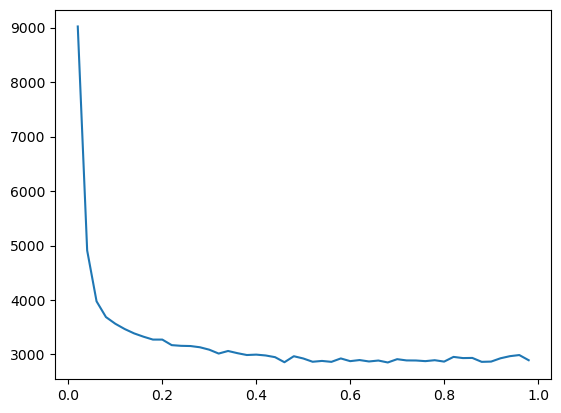

In [147]:
import matplotlib.pyplot as plt
lrates = [0.001*20*i for i in range(1,50)]
rmse_list=[]
for r in lrates:
    model_t = LGBMRegressor(n_estimators = 50, learning_rate = r)
    model_t.fit(X_train,y_train)
    y_pred = model_t.predict(X_test)
    rmse_list.append(np.sqrt(np.mean((y_pred-y_test)**2)))

plt.plot(lrates,rmse_list)
plt.show()

**Consigne**: Faire la même chose avec un LGBM de 100 arbres et un autre de 250, puis afficher le résultats avec le précédent.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 225195, number of used features: 28
[LightGBM] [Info] Start training from score 21513.854020
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 225195, number of used features: 28
[LightGBM] [Info] Start training from score 21513.854020
[LightGBM] [Warning]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 225195, number of used features: 28
[LightGBM] [Info] Start training from score 21513.854020
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 225195, number of used features: 28
[LightGBM] [Info] Start training from score 21513.854020
[LightGBM] [Warning]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 225195, number of used features: 28
[LightGBM] [Info] Start training from score 21513.854020
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 225195, number of used features: 28
[LightGBM] [Info] Start training from score 21513.854020
[LightGBM] [Warning]

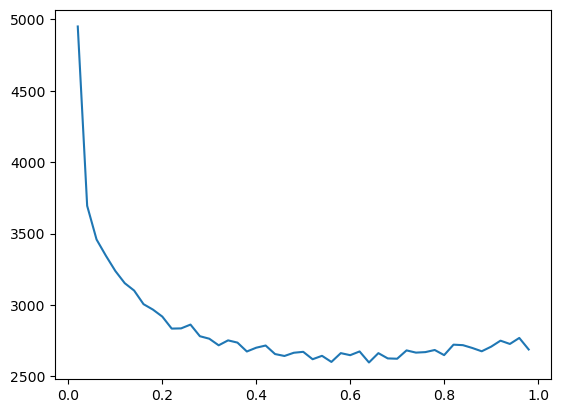

In [148]:
rmse_list100=[]
for r in lrates:
    model_t = LGBMRegressor(n_estimators = 100, learning_rate = r)
    model_t.fit(X_train,y_train)
    y_pred = model_t.predict(X_test)
    rmse_list100.append(np.sqrt(np.mean((y_pred-y_test)**2)))

plt.plot(lrates,rmse_list100)
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 225195, number of used features: 28
[LightGBM] [Info] Start training from score 21513.854020
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 225195, number of used features: 28
[LightGBM] [Info] Start training from score 21513.854020
[LightGBM] [Warning]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 225195, number of used features: 28
[LightGBM] [Info] Start training from score 21513.854020
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 225195, number of used features: 28
[LightGBM] [Info] Start training from score 21513.854020
[LightGBM] [Warning]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 225195, number of used features: 28
[LightGBM] [Info] Start training from score 21513.854020
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 225195, number of used features: 28
[LightGBM] [Info] Start training from score 21513.854020
[LightGBM] [Warning]

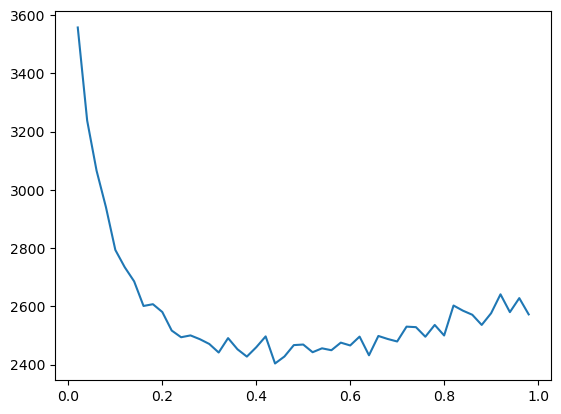

In [149]:
rmse_list250=[]
for r in lrates:
    model_t = LGBMRegressor(n_estimators = 250, learning_rate = r)
    model_t.fit(X_train,y_train)
    y_pred = model_t.predict(X_test)
    rmse_list250.append(np.sqrt(np.mean((y_pred-y_test)**2)))

plt.plot(lrates,rmse_list250)
plt.show()

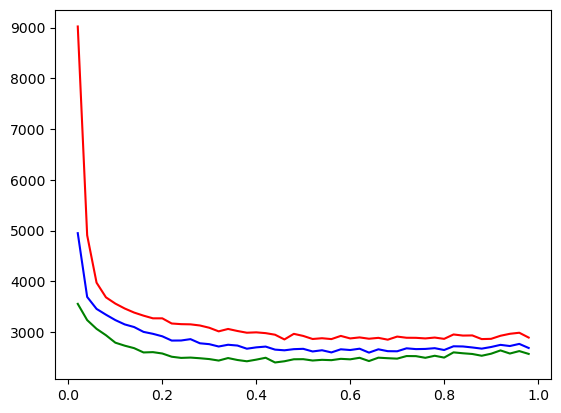

In [150]:
plt.plot(lrates,rmse_list, color ='r')
plt.plot(lrates,rmse_list100, color = 'b')
plt.plot(lrates,rmse_list250, color = 'g')
plt.show()

On souhaiterai avoir une vision du sur-apprentissage. Pour ce faire, nous allons mesurer l'écart entre les performances sur le dataset d'entraînement et celui de test.

**Consigne** : Reproduire le graphique précédent en ajoutant l'information de la performance sur le jeu d'entraînement.

## Régularisation : par la profondeur

Il y a un sur-apprentissage légé, et on voudrait pour le réduire. Il existe plusieurs possibilités pour cela, mais nous allons nous concentrer sur la profondeur maximale d'un arbre *max_depth*.

On considère dans la suite un modèle avec 250 arbres, et des learning rates entre $10^{-2}$ et $1$. Puisque nous allons reproduire plusieurs fois des cellules de codes similaires, commençons par en faire une fonction.

**Consigne** : Compléter la fonction *compute_performance* qui prend en paramètres:
* *learning_rates*: une liste de learning rates à tester
* *parameter_name*: le nom du paramètre du modèle que l'on souhaite tester
* *parameter_vales*: une liste de valeur à tester pour le paramètre d'intérêt

In [29]:
def compute_performance(learning_rates, parameter_name, parameter_values, **parameters):
    performances = []
    learning_rates.sort()
    
    for parameter_value in parameter_values:
        performance_train = []
        performance_test = []
        for learning_rate in learning_rates:
            parameters["learning_rate"] = ...
            parameters[...] = ...
            model = LGBMRegressor(**parameters)
            model.fit(..., ...)

            y_pred = model.predict(...)
            performance_train.append(RMSE(..., ...))

            y_pred = model.predict(...)
            performance_test.append(RMSE(..., ...))

        performances.append({parameter_name: parameter_value,
                             "performances_train": performance_train,
                             "performances_test": performance_test})
        
    return performances

Il nous faut maintenant de la visualisation. On utilisera la fonction *plot_performance* ci-dessous.

**Consigne**: À l'aide la fonction *compute_performance* et de la fonction *plot_performance*, visualiser l'impact de la profondeur des arbres en fonction du learning rate.

In [30]:
def plot_performance(performances, learning_rates, parameter_name):
    plt.figure(figsize=(15, 8))
    for index, element in enumerate(performances):
        color = sns.color_palette()[index]
        parameter_value = element[parameter_name]
        powers = -np.log(learning_rates)/np.log(10)
        plt.plot(powers, element["performances_test"], 'o-', label=f"{parameter_name} = {parameter_value}", color=color)
        plt.plot(powers, element["performances_train"], '--', color=color)


    plt.xlabel(r"$-\log(\eta)$")
    plt.ylabel("RMSE")
    plt.ylim(bottom=0)
    plt.title(f"RMSE en fonction du paramètre {parameter_name} pour un LGBM")
    plt.legend()
    plt.show()

## Importance des features

On se pose la question de l'importance de chacune des informations que l'on a donné au modèle. Pour le faire, on doit d'abord entraîner un modèle.

**Consigne** : Avec l'étude préalable, entraîner un modèle avec les  paramètre de votre choix.

**Consigne** : En utilisant la fonction [*plot_importance*](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.plot_importance.html) de LightGBM, afficher puis commenter l'importance des features.

## Et après ?

On peut s'attaquer à plusieurs axes de réflexion :
1. Comparer les performances entre les principaux algorithmes de boosting
2. Tester d'autres paramètres du boosting
3. Reprendre la préparation des données et l'améliorer.